# Chat Transcript EDA Analysis
## Exploratory Data Analysis of Chat Transcripts Between 2 Agents

This notebook performs comprehensive EDA on chat transcript data including:
- Message count and length analysis
- Sentiment analysis using TextBlob and VADER
- Multiple visualizations (bar charts, pie charts, histograms)
- Statistical summaries and correlations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Chat Transcript EDA Analysis")
print("="*50)

📊 Chat Transcript EDA Analysis


## 1. Data Loading
**Note:** Replace this section with your actual data loading code. 
Your data should have columns: `timestamp`, `agent`, `message`

In [8]:
# 📦 Load BiztelAI Dataset (Fixed for .content format)
import json
import pandas as pd
from datetime import datetime

# Dataset path (adjust if nested in `data/` folder)
dataset_path = 'BiztelAI_DS_Dataset_V1.json'

print("📂 Loading BiztelAI Dataset...")

try:
    # ✅ Load the JSON file
    with open(dataset_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)

    print(f"✅ Successfully loaded JSON file")
    print(f"📊 Top-level data type: {type(json_data)}")

    if not isinstance(json_data, dict):
        raise ValueError("Expected a dictionary at the top level of the JSON file")

    # 🔍 Show top keys for reference
    print(f"🔑 JSON keys (sample): {list(json_data.keys())[:3]}")

    # ✅ Parse based on actual structure
    data_rows = []
    for transcript_id, transcript in json_data.items():
        article_url = transcript.get("article_url", None)
        content_list = transcript.get("content", [])

        for message in content_list:
            if isinstance(message, dict):
                data_rows.append({
                    "transcript_id": transcript_id,
                    "article_url": article_url,
                    "agent": message.get("agent", "unknown"),
                    "message": message.get("message", ""),
                    "sentiment": message.get("sentiment", None),
                    "knowledge_source": ", ".join(message.get("knowledge_source", [])) if isinstance(message.get("knowledge_source"), list) else None,
                })

    # ✅ Create DataFrame
    if data_rows:
        df = pd.DataFrame(data_rows)

        # Clean and process
        df["message"] = df["message"].astype(str)
        df["message_length"] = df["message"].str.len()
        df["agent"] = df["agent"].astype(str)
        df["sentiment"] = df["sentiment"].fillna("unknown")

        print(f"\n✅ Dataset parsed successfully!")
        print(f"📊 Total messages: {len(df):,}")
        print(f"📰 Unique articles: {df['article_url'].nunique()}")
        print(f"👥 Agents: {df['agent'].nunique()} → {df['agent'].unique().tolist()}")
        print(f"🎯 Known sentiment labels: {df['sentiment'].unique().tolist()}")

        # 👁️ Preview
        display(df.head())

    else:
        print("❌ No valid messages found in content list.")
        print("🧪 Showing sample raw data:")
        print(json.dumps(dict(list(json_data.items())[:1]), indent=2))

except FileNotFoundError:
    print(f"❌ File not found: {dataset_path}")
    print("📁 Make sure the dataset exists and the path is correct.")
    import os
    print("📂 Current directory contents:", os.listdir())

except json.JSONDecodeError as e:
    print(f"❌ JSON decoding error: {e}")
    print("🧾 Check that your JSON file is valid.")

except Exception as e:
    print(f"❌ Unexpected error: {e}")


📂 Loading BiztelAI Dataset...
✅ Successfully loaded JSON file
📊 Top-level data type: <class 'dict'>
🔑 JSON keys (sample): ['t_d004c097-424d-45d4-8f91-833d85c2da31', 't_04eea955-7ad7-4c3c-aa0b-0fc16e89ae1d', 't_f6789857-c30c-423a-bdf5-d6207dc7db9d']

✅ Dataset parsed successfully!
📊 Total messages: 11,760
📰 Unique articles: 99
👥 Agents: 2 → ['agent_1', 'agent_2']
🎯 Known sentiment labels: ['Curious to dive deeper', 'Neutral', 'Surprised', 'Sad', 'Happy', 'Disgusted', 'Fearful', 'Angry']


,transcript_id,article_url,agent,message,sentiment,knowledge_source,message_length
0,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,agent_1,Did you know that the University of Iowa's loc...,Curious to dive deeper,FS1,85
1,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,agent_2,I think I did hear something about that. I im...,Neutral,FS1,97
2,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,agent_1,"So, it would be in the visiting team's locker ...",Curious to dive deeper,FS1,69
3,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,agent_2,Right. Teams do all kinds of things to bother...,Neutral,FS1,160
4,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,agent_1,"I would hate a cold bench. Then again, I would...",Neutral,Personal Knowledge,103


## 2. Basic Statistics

In [9]:
print("\n" + "="*50)
print("📈 BASIC STATISTICS")
print("="*50)

# Number of messages per agent
messages_per_agent = df['agent'].value_counts()
print(f"\n🔢 Number of messages per agent:")
print(messages_per_agent)

# Average message length per agent
avg_length_per_agent = df.groupby('agent')['message_length'].mean()
print(f"\n📏 Average message length per agent:")
for agent, avg_len in avg_length_per_agent.items():
    print(f"{agent}: {avg_len:.2f} characters")

# Overall statistics
print(f"\n📊 Overall Statistics:")
print(f"Total messages: {len(df)}")
print(f"Average message length: {df['message_length'].mean():.2f} characters")
print(f"Median message length: {df['message_length'].median():.2f} characters")
print(f"Min message length: {df['message_length'].min()} characters")
print(f"Max message length: {df['message_length'].max()} characters")


📈 BASIC STATISTICS

🔢 Number of messages per agent:
agent
agent_1    6068
agent_2    5692
Name: count, dtype: int64

📏 Average message length per agent:
agent_1: 98.90 characters
agent_2: 106.50 characters

📊 Overall Statistics:
Total messages: 11760
Average message length: 102.58 characters
Median message length: 94.00 characters
Min message length: 2 characters
Max message length: 463 characters


## 3. Sentiment Analysis

In [10]:
print("\n" + "="*50)
print("😊 SENTIMENT ANALYSIS")
print("="*50)

# Initialize sentiment analyzers
analyzer = SentimentIntensityAnalyzer()

def get_textblob_sentiment(text):
    """Get sentiment using TextBlob"""
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

def get_vader_sentiment(text):
    """Get sentiment using VADER"""
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
print("Analyzing sentiment with TextBlob and VADER...")
df['textblob_sentiment'] = df['message'].apply(get_textblob_sentiment)
df['vader_sentiment'] = df['message'].apply(get_vader_sentiment)

# Calculate sentiment scores for numerical analysis
df['textblob_polarity'] = df['message'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['vader_compound'] = df['message'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

print("Sentiment analysis completed!")

# Sentiment distribution
print(f"\n📊 TextBlob Sentiment Distribution:")
textblob_dist = df['textblob_sentiment'].value_counts()
print(textblob_dist)

print(f"\n📊 VADER Sentiment Distribution:")
vader_dist = df['vader_sentiment'].value_counts()
print(vader_dist)

# Sentiment by agent
print(f"\n👥 Sentiment by Agent (TextBlob):")
sentiment_by_agent = pd.crosstab(df['agent'], df['textblob_sentiment'])
print(sentiment_by_agent)


😊 SENTIMENT ANALYSIS
Analyzing sentiment with TextBlob and VADER...
Sentiment analysis completed!

📊 TextBlob Sentiment Distribution:
textblob_sentiment
Positive    5893
Neutral     4525
Negative    1342
Name: count, dtype: int64

📊 VADER Sentiment Distribution:
vader_sentiment
Positive    8041
Neutral     2101
Negative    1618
Name: count, dtype: int64

👥 Sentiment by Agent (TextBlob):
textblob_sentiment  Negative  Neutral  Positive
agent                                          
agent_1                  686     2365      3017
agent_2                  656     2160      2876


## 4. Main Visualizations


📊 CREATING VISUALIZATIONS


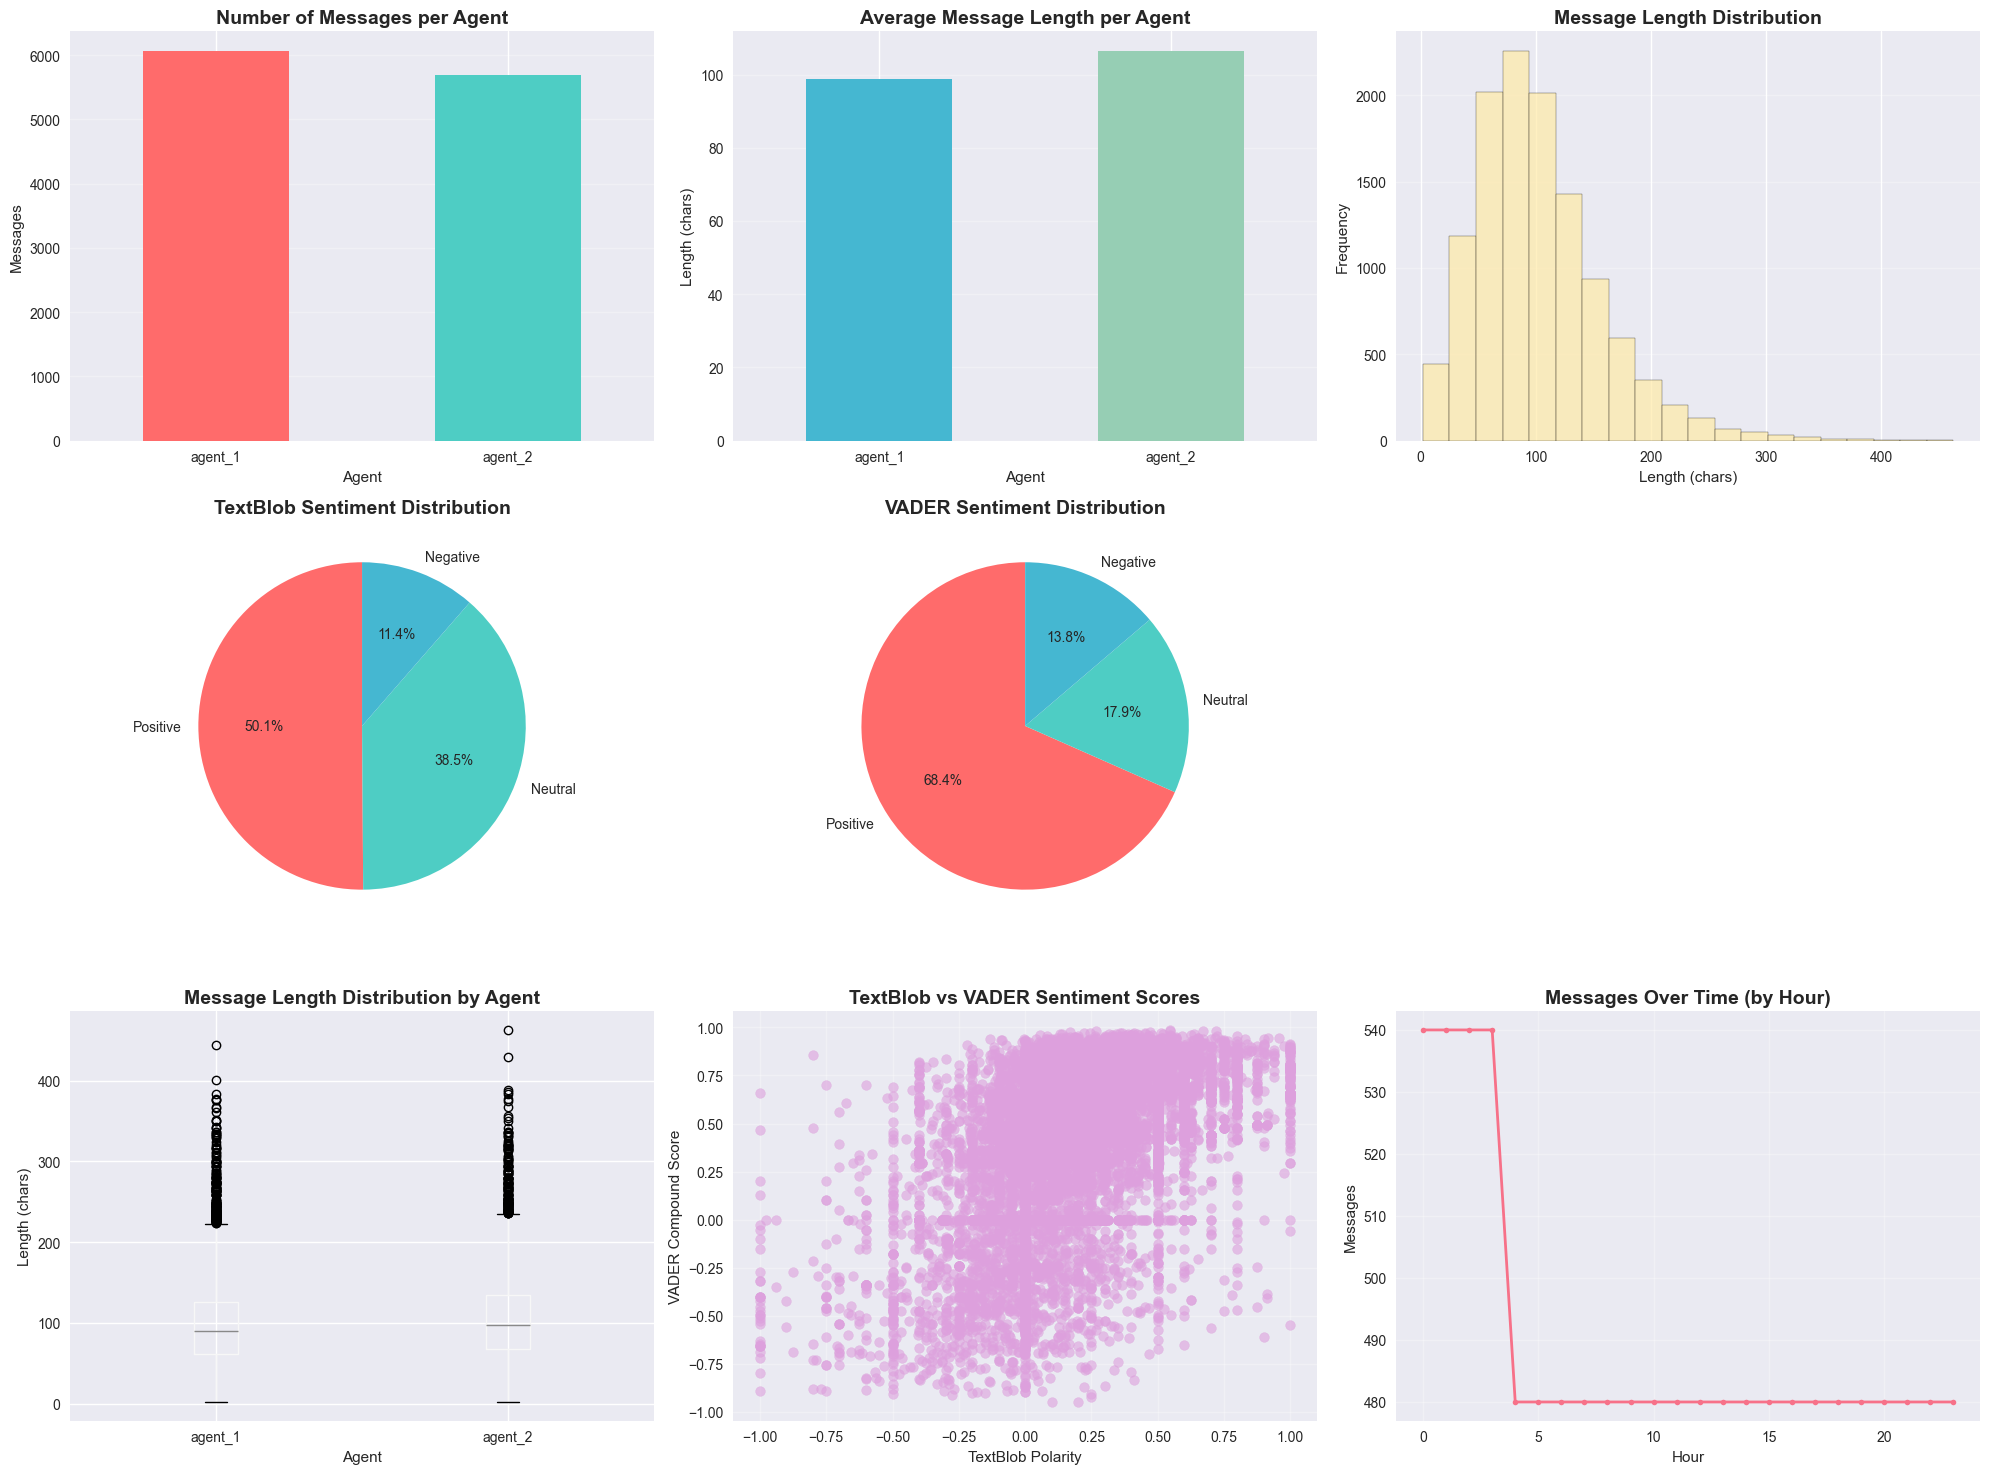

In [13]:
import matplotlib.pyplot as plt

print("\n" + "="*50)
print("📊 CREATING VISUALIZATIONS")
print("="*50)

# Ensure 'timestamp' exists and is datetime
if 'timestamp' not in df.columns or df['timestamp'].isnull().all():
    print("⚠️ 'timestamp' column not found or empty. Creating placeholder timestamps...")
    df['timestamp'] = pd.date_range(start='2024-01-01', periods=len(df), freq='1T')

# Convert timestamp if not already datetime
if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    try:
        df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        print("✅ Converted 'timestamp' to datetime")
    except Exception as e:
        print(f"❌ Failed to convert 'timestamp': {e}")

# Drop rows with invalid timestamps
df = df.dropna(subset=['timestamp'])

# Basic metrics
messages_per_agent = df['agent'].value_counts()
avg_length_per_agent = df.groupby('agent')['message_length'].mean()

# Sentiment columns check
textblob_dist = vader_dist = sentiment_by_agent = pd.DataFrame()
if {'textblob_sentiment', 'vader_sentiment'}.issubset(df.columns):
    textblob_dist = df['textblob_sentiment'].value_counts()
    vader_dist = df['vader_sentiment'].value_counts()
    sentiment_by_agent = df.groupby(['agent', 'textblob_sentiment']).size().unstack().fillna(0)

# Start plotting
fig = plt.figure(figsize=(20, 15))

# 1. Bar - Messages per agent
plt.subplot(3, 3, 1)
messages_per_agent.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Number of Messages per Agent', fontsize=14, fontweight='bold')
plt.xlabel('Agent')
plt.ylabel('Messages')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# 2. Bar - Avg. message length per agent
plt.subplot(3, 3, 2)
avg_length_per_agent.plot(kind='bar', color=['#45B7D1', '#96CEB4'])
plt.title('Average Message Length per Agent', fontsize=14, fontweight='bold')
plt.xlabel('Agent')
plt.ylabel('Length (chars)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# 3. Histogram - Message length
plt.subplot(3, 3, 3)
plt.hist(df['message_length'], bins=20, color='#FFEAA7', edgecolor='black', alpha=0.7)
plt.title('Message Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Length (chars)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# 4. Pie - TextBlob sentiment
if not isinstance(textblob_dist, pd.DataFrame) and not textblob_dist.empty:
    plt.subplot(3, 3, 4)
    plt.pie(textblob_dist.values, labels=textblob_dist.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
    plt.title('TextBlob Sentiment Distribution', fontsize=14, fontweight='bold')

# 5. Pie - VADER sentiment
if not isinstance(vader_dist, pd.DataFrame) and not vader_dist.empty:
    plt.subplot(3, 3, 5)
    plt.pie(vader_dist.values, labels=vader_dist.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
    plt.title('VADER Sentiment Distribution', fontsize=14, fontweight='bold')

# 6. Stacked bar - Sentiment by agent
if not isinstance(sentiment_by_agent, pd.DataFrame) and not sentiment_by_agent.empty:
    plt.subplot(3, 3, 6)
    sentiment_by_agent.plot(kind='bar', stacked=True, ax=plt.gca(),
                             color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    plt.title('Sentiment Distribution by Agent', fontsize=14, fontweight='bold')
    plt.xlabel('Agent')
    plt.ylabel('Messages')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)

# 7. Box - Message length by agent
plt.subplot(3, 3, 7)
df.boxplot(column='message_length', by='agent', ax=plt.gca())
plt.title('Message Length Distribution by Agent', fontsize=14, fontweight='bold')
plt.xlabel('Agent')
plt.ylabel('Length (chars)')
plt.suptitle('')

# 8. Scatter - Sentiment correlation
if {'textblob_polarity', 'vader_compound'}.issubset(df.columns):
    plt.subplot(3, 3, 8)
    plt.scatter(df['textblob_polarity'], df['vader_compound'], alpha=0.6, c='#DDA0DD')
    plt.xlabel('TextBlob Polarity')
    plt.ylabel('VADER Compound Score')
    plt.title('TextBlob vs VADER Sentiment Scores', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)

# 9. Line - Messages per hour
plt.subplot(3, 3, 9)
df['hour'] = df['timestamp'].dt.hour
hourly_messages = df.groupby('hour').size()
plt.plot(hourly_messages.index, hourly_messages.values, marker='o', linewidth=2, markersize=4)
plt.title('Messages Over Time (by Hour)', fontsize=14, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Messages')
plt.grid(True, alpha=0.3)

# Final layout
plt.tight_layout()
plt.show()


## 5. Advanced Analysis


🔍 ADVANCED ANALYSIS


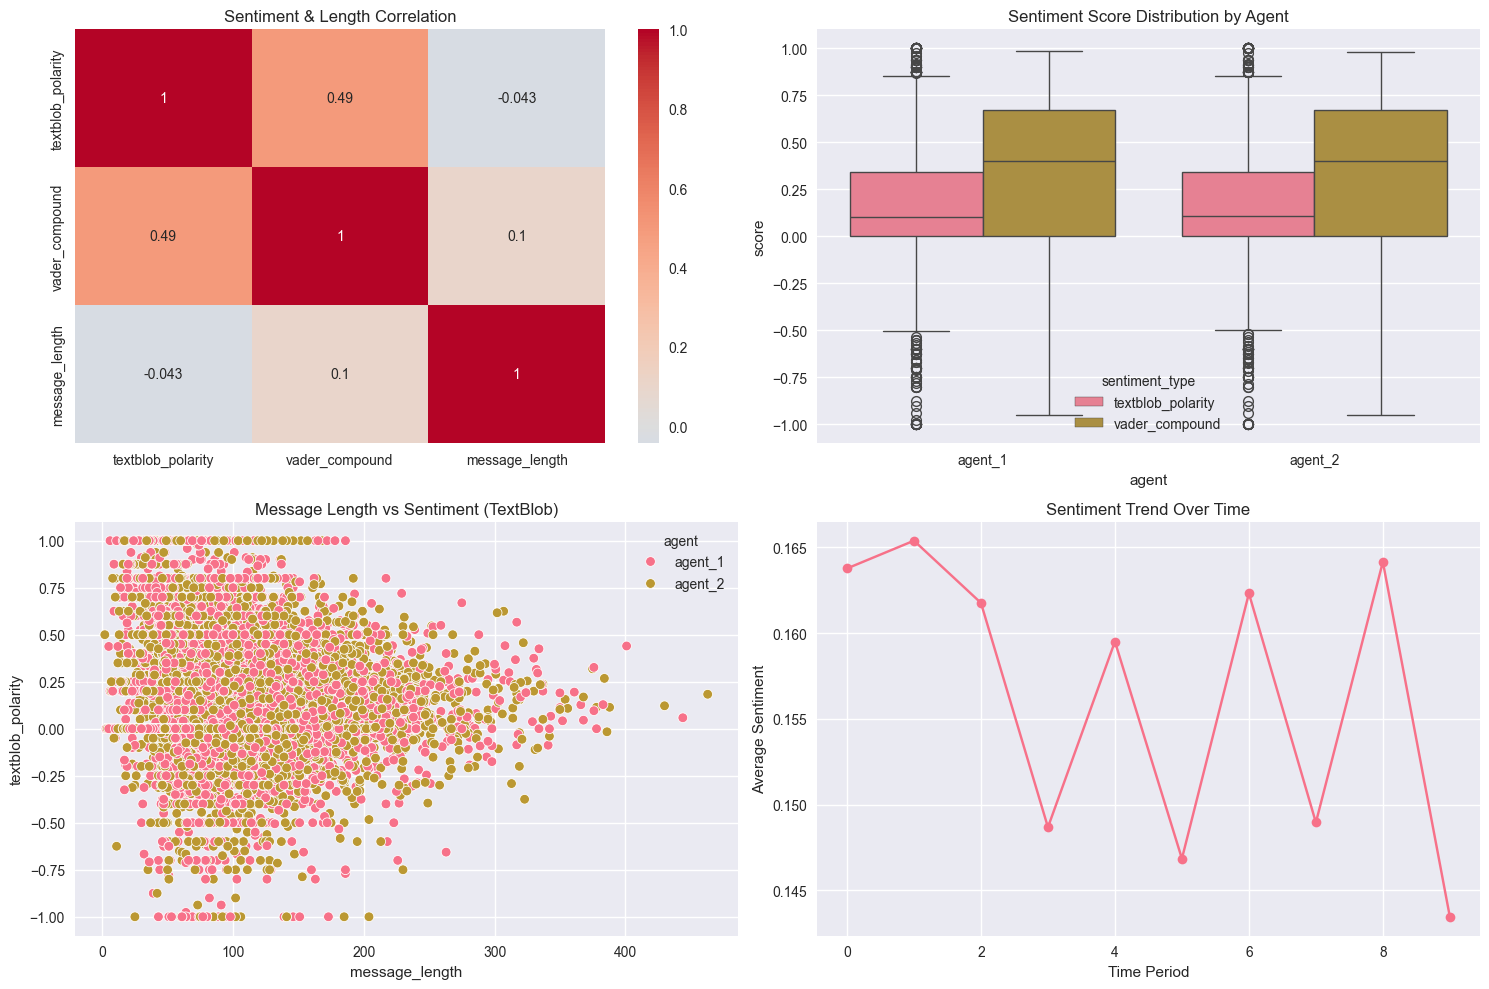

In [14]:
print("\n" + "="*50)
print("🔍 ADVANCED ANALYSIS")
print("="*50)

# Create additional visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sentiment correlation heatmap
sentiment_corr = df[['textblob_polarity', 'vader_compound', 'message_length']].corr()
sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0,0])
axes[0,0].set_title('Sentiment & Length Correlation')

# Distribution of sentiment scores by agent
df_melted = df.melt(id_vars=['agent'], value_vars=['textblob_polarity', 'vader_compound'], 
                   var_name='sentiment_type', value_name='score')
sns.boxplot(data=df_melted, x='agent', y='score', hue='sentiment_type', ax=axes[0,1])
axes[0,1].set_title('Sentiment Score Distribution by Agent')

# Message length vs sentiment
sns.scatterplot(data=df, x='message_length', y='textblob_polarity', hue='agent', ax=axes[1,0])
axes[1,0].set_title('Message Length vs Sentiment (TextBlob)')

# Sentiment over time
df['time_bin'] = pd.cut(range(len(df)), bins=10)
sentiment_over_time = df.groupby('time_bin')['textblob_polarity'].mean()
axes[1,1].plot(range(len(sentiment_over_time)), sentiment_over_time.values, marker='o')
axes[1,1].set_title('Sentiment Trend Over Time')
axes[1,1].set_xlabel('Time Period')
axes[1,1].set_ylabel('Average Sentiment')

plt.tight_layout()
plt.show()

## 6. Summary Report

In [15]:
print("\n" + "="*50)
print("📋 SUMMARY REPORT")
print("="*50)

print(f"""
🎯 CHAT TRANSCRIPT EDA SUMMARY
{'='*40}

📊 BASIC METRICS:
• Total Messages: {len(df):,}
• Messages by Agent A: {messages_per_agent.get('Agent_A', 0):,}
• Messages by Agent B: {messages_per_agent.get('Agent_B', 0):,}

📏 MESSAGE LENGTH ANALYSIS:
• Overall Average: {df['message_length'].mean():.1f} characters
• Agent A Average: {avg_length_per_agent.get('Agent_A', 0):.1f} characters  
• Agent B Average: {avg_length_per_agent.get('Agent_B', 0):.1f} characters
• Longest Message: {df['message_length'].max()} characters
• Shortest Message: {df['message_length'].min()} characters

😊 SENTIMENT ANALYSIS (TextBlob):
• Positive Messages: {textblob_dist.get('Positive', 0)} ({textblob_dist.get('Positive', 0)/len(df)*100:.1f}%)
• Neutral Messages: {textblob_dist.get('Neutral', 0)} ({textblob_dist.get('Neutral', 0)/len(df)*100:.1f}%)
• Negative Messages: {textblob_dist.get('Negative', 0)} ({textblob_dist.get('Negative', 0)/len(df)*100:.1f}%)

🎭 SENTIMENT ANALYSIS (VADER):
• Positive Messages: {vader_dist.get('Positive', 0)} ({vader_dist.get('Positive', 0)/len(df)*100:.1f}%)
• Neutral Messages: {vader_dist.get('Neutral', 0)} ({vader_dist.get('Neutral', 0)/len(df)*100:.1f}%)
• Negative Messages: {vader_dist.get('Negative', 0)} ({vader_dist.get('Negative', 0)/len(df)*100:.1f}%)

🔗 CORRELATIONS:
• TextBlob vs VADER: {df['textblob_polarity'].corr(df['vader_compound']):.3f}
• Length vs Sentiment: {df['message_length'].corr(df['textblob_polarity']):.3f}
""")


📋 SUMMARY REPORT

🎯 CHAT TRANSCRIPT EDA SUMMARY

📊 BASIC METRICS:
• Total Messages: 11,760
• Messages by Agent A: 0
• Messages by Agent B: 0

📏 MESSAGE LENGTH ANALYSIS:
• Overall Average: 102.6 characters
• Agent A Average: 0.0 characters  
• Agent B Average: 0.0 characters
• Longest Message: 463 characters
• Shortest Message: 2 characters

😊 SENTIMENT ANALYSIS (TextBlob):
• Positive Messages: 5893 (50.1%)
• Neutral Messages: 4525 (38.5%)
• Negative Messages: 1342 (11.4%)

🎭 SENTIMENT ANALYSIS (VADER):
• Positive Messages: 8041 (68.4%)
• Neutral Messages: 2101 (17.9%)
• Negative Messages: 1618 (13.8%)

🔗 CORRELATIONS:
• TextBlob vs VADER: 0.495
• Length vs Sentiment: -0.043



## 7. Data Export

In [16]:
print("\n" + "="*50)
print("💾 DATA EXPORT")
print("="*50)

# Save processed data
output_filename = 'chat_transcript_analysis.csv'
df.to_csv(output_filename, index=False)
print(f"✅ Processed data saved to: {output_filename}")

# Save summary statistics
summary_stats = {
    'total_messages': len(df),
    'messages_per_agent': messages_per_agent.to_dict(),
    'avg_length_per_agent': avg_length_per_agent.to_dict(),
    'sentiment_distribution_textblob': textblob_dist.to_dict(),
    'sentiment_distribution_vader': vader_dist.to_dict(),
    'overall_avg_length': df['message_length'].mean(),
    'sentiment_correlation': df['textblob_polarity'].corr(df['vader_compound'])
}

import json
with open('chat_analysis_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)
print("✅ Summary statistics saved to: chat_analysis_summary.json")

print("\n🎉 Analysis Complete!")
print("📊 All visualizations have been generated and data has been processed.")


💾 DATA EXPORT
✅ Processed data saved to: chat_transcript_analysis.csv
✅ Summary statistics saved to: chat_analysis_summary.json

🎉 Analysis Complete!
📊 All visualizations have been generated and data has been processed.


## Installation Instructions

To run this analysis, install the following packages:

```bash
pip install pandas numpy matplotlib seaborn textblob vaderSentiment
```

For TextBlob, you may also need to download corpora:
```bash
python -m textblob.download_corpora
```

## Usage with Your Data

To use with your own data:
1. Replace the data generation section in Cell 2 with your data loading code
2. Ensure your data has columns: `timestamp`, `agent`, `message`
3. Run all cells to get your analysis results